In [1]:
import pandas as pd
import numpy as np

filepath_hi = '../../data/processed/hi_rws_0001_0256_topics.csv'
df = pd.read_csv(filepath_hi)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195769 entries, 0 to 195768
Data columns (total 12 columns):
lsi_5_topic_mode                          195746 non-null float64
lsi_5_topic_mode_prob                     195769 non-null object
lsi_5_topic_list                          195769 non-null object
lsi_logentropy_topic_mode                 195746 non-null float64
lsi_logentropy_topic_mode_prob            195769 non-null object
lsi_logentropy_topic_list                 195769 non-null object
lsi_random_projections_topic_mode         195455 non-null float64
lsi_random_projections_topic_mode_prob    195769 non-null object
lsi_random_projections_topic_list         195769 non-null object
lda_5_topic_mode                          195769 non-null int64
lda_5_topic_mode_prob                     195769 non-null object
lda_5_topic_list                          195769 non-null object
dtypes: float64(3), int64(1), object(8)
memory usage: 17.9+ MB


## Document Topic Distributions

In [3]:
import matplotlib.pyplot as plt
[i for i in df.columns if i.endswith('_mode')]

['lsi_5_topic_mode',
 'lsi_logentropy_topic_mode',
 'lsi_random_projections_topic_mode',
 'lda_5_topic_mode']

In [ ]:
# all topics frequency distribution 
import matplotlib.pyplot as plt

topic_models_list = [i for i in df.columns if i.endswith('_mode')]
# topic_models_list.remove('lda_random_projections_topic_mode')
fig, axes = plt.subplots(len(topic_models_list), 2, figsize=(15, 20))

for i, model in enumerate(topic_models_list):
    topic_freqs = df[model].value_counts().sort_index().plot(ax=axes[i, 0], title='mode frequencies')
    pd_topic_frequencies = df[model+'_prob'].apply(lambda x: pd.Series(x.split(',')).value_counts()).fillna(0)
    topic_sent_freqs = pd_topic_frequencies.sum().sort_index().plot(ax=axes[i, 1], title='sent topic frequencies')

plt.show()

In [4]:
df.lsi_5_topic_mode.value_counts().sort_index()

0.0    185561
1.0       435
2.0      5227
3.0       647
4.0      3876
Name: lsi_5_topic_mode, dtype: int64

In [5]:
df.lsi_logentropy_topic_mode.value_counts().sort_index()

0.0     75408
1.0    115453
2.0       966
3.0         3
4.0      3916
Name: lsi_logentropy_topic_mode, dtype: int64

In [6]:
df.lsi_random_projections_topic_mode.value_counts().sort_index()

0.0    55028
1.0    41439
2.0    35231
3.0    29967
4.0    33790
Name: lsi_random_projections_topic_mode, dtype: int64

In [7]:
df.lda_5_topic_mode.value_counts().sort_index()

0    42781
1    73469
2    29408
3    11254
4    38857
Name: lda_5_topic_mode, dtype: int64

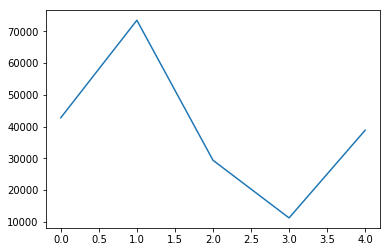

In [8]:
df.lda_5_topic_mode.value_counts().sort_index().plot()

In [9]:
pd_topic_frequencies = df.lda_5_topic_mode_prob.apply(lambda x: pd.Series(x.split(',')).value_counts()) #.fillna(0)

In [23]:
pd_topic_frequencies = pd_topic_frequencies.fillna(0).reindex(columns=sorted(pd_topic_frequencies))
pd_topic_frequencies.columns = [f'topic_{i}' for i in range(5)]
pd_topic_frequencies.head()

,topic_0,topic_1,topic_2,topic_3,topic_4
0,1.0,5.0,2.0,1.0,2.0
1,1.0,1.0,1.0,1.0,1.0
2,2.0,4.0,3.0,0.0,5.0
3,8.0,8.0,7.0,2.0,9.0
4,1.0,3.0,2.0,1.0,3.0


In [26]:
pd_lda_5_mode = df.lda_5_topic_mode.copy()
pd_lda_5_mode.name = 'topic_score'
pd.concat([pd_topic_frequencies, pd_lda_5_mode], axis=1)

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_score
0,1.0,5.0,2.0,1.0,2.0,1
1,1.0,1.0,1.0,1.0,1.0,4
2,2.0,4.0,3.0,0.0,5.0,4
3,8.0,8.0,7.0,2.0,9.0,4
4,1.0,3.0,2.0,1.0,3.0,1
5,2.0,1.0,0.0,1.0,2.0,4
6,1.0,3.0,0.0,0.0,2.0,1
7,4.0,4.0,4.0,0.0,2.0,1
8,1.0,3.0,2.0,0.0,2.0,1
9,5.0,2.0,1.0,0.0,2.0,0


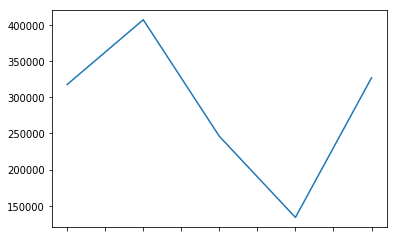

In [116]:
pd_topic_frequencies.sum().transpose().sort_index().plot()

In [128]:
pd_topic_frequencies[sorted(pd_topic_frequencies.columns)]

,0,1,2,3,4
0,1.0,5.0,2.0,1.0,2.0
1,1.0,1.0,1.0,1.0,1.0
2,2.0,4.0,3.0,0.0,5.0
3,8.0,8.0,7.0,2.0,9.0
4,1.0,3.0,2.0,1.0,3.0
5,2.0,1.0,0.0,1.0,2.0
6,1.0,3.0,0.0,0.0,2.0
7,4.0,4.0,4.0,0.0,2.0
8,1.0,3.0,2.0,0.0,2.0
9,5.0,2.0,1.0,0.0,2.0


## Topics Models

In [2]:
import pickle
obj_name_list = [
    'id2word', 
    'doc_term_matrix', 
    'doc_term_matrix_random_projections', 
    'doc_term_matrix_tfidf', 
    'doc_term_matrix_logentropy'
]
obj_list = []
for name in obj_name_list:
    with open(f'../../model/dict_and_matrix/{name}.pkl', 'rb') as f:
        obj_list.append(pickle.load(f))

id2word, doc_term_matrix, doc_term_matrix_random_projections, doc_term_matrix_tfidf, doc_term_matrix_logentropy = obj_list

In [8]:
import itertools
import ast
df2 = pd.read_csv('../../data/processed/hi_rws_0001_0256_complete.csv')
revs = df2.norm_tokens_doc[:1000].apply(lambda x: ast.literal_eval(x))
docs = list(itertools.chain(*revs))

In [95]:
models_list = [i.split('_topic_mode')[0] for i in df.columns if i.endswith('topic_mode')]
models_list
# [i.split('_topic_mode')[0] for i in models_list]

['lsi_5', 'lsi_logentropy', 'lsi_random_projections', 'lda_5']

In [ ]:
# load models
from gensim.models import LdaModel, LsiModel

zipped = zip(models_list, (doc_term_matrix, doc_term_matrix_logentropy, 
     doc_term_matrix_random_projections, doc_term_matrix))

coherence_list = []
topic_coherence_list = []
loaded_models_list = []
for model, doc_term_matrix in zipped:
    model_path = f'../../model/{model[:3]}_model/{model}.model'
    loaded_model = LdaModel.load(model_path) if model[:3] == 'lda' else LsiModel.load(model_path)
    loaded_models_list.append(loaded_model)
    
    coherencemodel = CoherenceModel(model=loaded_model, corpus=doc_term_matrix, coherence='u_mass')
    topic_coherences = coherencemodel.get_coherence_per_topic()
    topic_coherence_list.append((model, topic_coherences))
    coherence_list.append(round(coherencemodel.get_coherence(), 4))
    print(loaded_model)

LsiModel(num_terms=9059, num_topics=5, decay=1.0, chunksize=20000)
LsiModel(num_terms=87979, num_topics=5, decay=1.0, chunksize=20000)


In [149]:
pd_topic_coherence_list = []
for model, topic_coherence in topic_coherence_list:
    pd_topic_coherence_list.append(pd.Series(topic_coherence, name=model))
pd.concat(pd_topic_coherence_list, axis=1).transpose()

,0,1,2,3,4
lsi_5,0.135654,0.203163,0.286336,0.266783,0.278940
lsi_logentropy,0.151335,0.275140,0.434991,0.247418,NaN
lsi_random_projections,NaN,NaN,NaN,NaN,NaN
lda_5,0.429427,0.330332,0.401339,0.393156,0.258291


In [139]:
coherence_list

[0.2341751764315662, nan, nan, 0.36250926657799176]

In [69]:
for model in loaded_models_list:
    print(model.show_topics(num_words=3), sep='\n\n\n')

[(0, '0.416*"great" + 0.357*"food" + 0.280*"good"'), (1, '0.522*"fish" + -0.496*"great" + -0.304*"food"'), (2, '-0.665*"fish" + 0.388*"\'s" + -0.254*"great"'), (3, '-0.727*"good" + 0.433*"great" + -0.375*"food"'), (4, '-0.600*"\'s" + 0.517*"n\'t" + -0.322*"kimo"')]
[(0, '0.440*"great" + 0.439*"food" + 0.393*"good"'), (1, '-0.390*"great" + -0.326*"servic" + 0.258*"back"'), (2, '-0.770*"good" + 0.488*"great" + 0.189*"place"'), (3, '-0.500*"fish" + -0.424*"taco" + -0.360*"view"'), (4, '0.694*"ice" + 0.575*"shave" + 0.213*"cream"')]
[(0, '-0.603*"ocean" + 0.568*"maui" + 0.465*"across"'), (1, '-0.855*"lunch" + -0.344*"maui" + 0.303*"great"'), (2, '0.749*"across" + -0.602*"great" + 0.247*"ocean"'), (3, '0.676*"ocean" + 0.513*"great" + 0.409*"maui"'), (4, '-0.614*"maui" + 0.488*"great" + 0.409*"lunch"')]
[(0, '0.032*"\'s" + 0.031*"maui" + 0.026*"place"'), (1, '0.026*"got" + 0.025*"order" + 0.019*"drink"'), (2, '0.031*"n\'t" + 0.021*"u" + 0.015*"server"'), (3, '0.048*"fish" + 0.023*"burger" + 

In [103]:
# make a dataframe from words
topic_words = loaded_models_list[1].show_topics(num_words=20, formatted=False)

topics_list = []
for (topic, word_list) in topic_words:
    temp = pd.DataFrame(word_list, columns=[f'{topic}_word', f'{topic}_prob'])
    topics_list.append(temp)
pd.concat(topics_list, axis=1)

[(0,
  [('great', 0.4402632633812508),
   ('food', 0.43876758648948966),
   ('good', 0.3925059772271627),
   ('servic', 0.33175574214496745),
   ('place', 0.1821950619999872),
   ('amaz', 0.10588876857017492),
   ("n't", 0.10291730212545301),
   ('realli', 0.09845122446158507),
   ('friendli', 0.09618291522518395),
   ("'s", 0.09503847340771154),
   ('delici', 0.09464711465041661),
   ('price', 0.09453901426069661),
   ('maui', 0.08701644304994097),
   ('view', 0.08493198587470652),
   ('go', 0.07859548397108625),
   ('excel', 0.07838214338662605),
   ('fish', 0.07495692511202819),
   ('love', 0.07232461730836656),
   ('back', 0.07223437090944107),
   ('time', 0.0715395662556819)]),
 (1,
  [('great', -0.3899229171726041),
   ('servic', -0.3259319404650535),
   ('back', 0.2576940765928029),
   ('place', 0.21645692712077108),
   ('food', -0.21287041835976575),
   ('go', 0.20800341709983416),
   ('maui', 0.19174000431146787),
   ("n't", 0.17545476791245235),
   ('definit', 0.1682085785984

In [ ]:
# this is unclear
from gensim.models import LdaModel, LsiModel
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary

id2word = Dictionary(docs)

model_list = []
coherence_list = []
perplexity_list = []
for model in [i.split('_topic_mode')[0] for i in models_list]:
    model_path = f'../../model/{model[:3]}_model/{model}.model'
    loaded_model = LdaModel.load(model_path) if model[:3] == 'lda' else LsiModel.load(model_path)
    model_list.append(loaded_model)
    # perplexity_list.append(loaded_model.log_perplexity())
    coherencemodel = CoherenceModel(model=loaded_model, corpus=docs, texts=revs, dictionary=id2word)
    coherence_list.append(coherencemodel.get_coherence())

In [81]:
coherence_list

[nan, nan, nan, nan]

In [ ]:
prin